In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
import credit_pipeline.training as tr
import credit_pipeline.reject_inference as ri

In [36]:
from mpi4py import MPI
import socket

In [37]:
df = pd.read_csv('data/asteroid-dataset.csv')
df, df_test = train_test_split(df, test_size=0.2, random_state=42)

/tmp/ipykernel_4486/1714289756.py:1: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/asteroid-dataset.csv')


In [38]:
#get numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_columns

['spkid',
 'H',
 'diameter',
 'albedo',
 'diameter_sigma',
 'epoch',
 'epoch_mjd',
 'epoch_cal',
 'e',
 'a',
 'q',
 'i',
 'om',
 'w',
 'ma',
 'ad',
 'n',
 'tp',
 'tp_cal',
 'per',
 'per_y',
 'moid',
 'moid_ld',
 'sigma_e',
 'sigma_a',
 'sigma_q',
 'sigma_i',
 'sigma_om',
 'sigma_w',
 'sigma_ma',
 'sigma_ad',
 'sigma_n',
 'sigma_tp',
 'sigma_per',
 'rms']

In [39]:
df[numeric_columns]

,spkid,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,...,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
307413,2307414,16.000,2.312,0.158,0.590,2459000.5,59000,20200531.0,0.069623,2.526513,...,1.219500e-06,0.000007,0.000019,0.000082,0.000116,1.994600e-08,2.717100e-09,0.000475,0.000016,0.59534
376242,2376243,16.200,NaN,NaN,NaN,2459000.5,59000,20200531.0,0.087378,2.796229,...,1.780500e-07,0.000006,0.000054,0.000062,0.000032,4.426100e-08,4.602600e-09,0.000149,0.000037,0.59109
850738,3795825,17.400,NaN,NaN,NaN,2459000.5,59000,20200531.0,0.130648,2.516467,...,2.749700e-07,0.000009,0.000109,0.000114,0.000048,8.299100e-08,1.080200e-08,0.000171,0.000064,0.53880
355661,2355662,16.100,NaN,NaN,NaN,2459000.5,59000,20200531.0,0.258975,3.167329,...,2.577200e-07,0.000009,0.000084,0.000088,0.000022,5.911200e-08,3.887900e-09,0.000123,0.000046,0.48429
632100,3997587,17.161,NaN,NaN,NaN,2459000.5,59000,20200531.0,0.146104,3.145896,...,3.015100e-07,0.000015,0.000097,0.000112,0.000055,1.141400e-07,8.387500e-09,0.000311,0.000097,0.63627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,2259179,15.100,2.212,0.329,0.588,2459000.5,59000,20200531.0,0.323816,2.632197,...,7.810000e-08,0.000008,0.000007,0.000016,0.000012,1.919100e-08,1.906700e-09,0.000054,0.000013,0.49199
365838,2365839,17.700,NaN,NaN,NaN,2459000.5,59000,20200531.0,0.117952,2.319068,...,8.632900e-08,0.000005,0.000043,0.000050,0.000027,1.954200e-08,3.155400e-09,0.000094,0.000015,0.51033
131932,2131933,15.700,2.327,0.271,0.312,2459000.5,59000,20200531.0,0.171215,2.360925,...,8.932500e-08,0.000004,0.000025,0.000028,0.000012,1.070200e-08,1.577300e-09,0.000045,0.000008,0.49729
671155,3886191,17.203,NaN,NaN,NaN,2459000.5,59000,20200531.0,0.113568,2.576276,...,5.986500e-07,0.000015,0.000054,0.000095,0.000063,5.811400e-08,7.242300e-09,0.000268,0.000046,0.63209


In [40]:
df.columns

Index(['id', 'spkid', 'full_name', 'pdes', 'name', 'prefix', 'neo', 'pha', 'H',
       'diameter', 'albedo', 'diameter_sigma', 'orbit_id', 'epoch',
       'epoch_mjd', 'epoch_cal', 'equinox', 'e', 'a', 'q', 'i', 'om', 'w',
       'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld',
       'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w',
       'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'class',
       'rms'],
      dtype='object')

In [41]:
df['pha'].value_counts()

pha
N    749330
Y      1643
Name: count, dtype: int64

In [42]:
df['pha'] = df['pha'].map({'N': 0, 'Y': 1})
df['pha'] = df['pha'].fillna(-1)


In [43]:
df['pha'].value_counts()

pha
 0.0    749330
-1.0     15846
 1.0      1643
Name: count, dtype: int64

In [44]:
numeric_columns.append('pha')

In [45]:
df[numeric_columns].corr()['pha'].sort_values()

H                -0.034506
moid             -0.030113
diameter         -0.019826
diameter_sigma   -0.016068
spkid            -0.011536
ma               -0.008824
q                -0.002147
sigma_e          -0.000363
sigma_q          -0.000329
sigma_i          -0.000283
sigma_n          -0.000186
sigma_om         -0.000164
sigma_a          -0.000158
sigma_per        -0.000137
sigma_ad         -0.000135
sigma_w          -0.000074
sigma_ma         -0.000074
sigma_tp         -0.000073
per_y             0.000350
per               0.000350
a                 0.000491
om                0.001165
ad                0.001258
w                 0.001695
tp                0.003641
tp_cal            0.003677
i                 0.003927
rms               0.012657
epoch_cal         0.014871
epoch             0.016908
epoch_mjd         0.016908
albedo            0.018955
n                 0.055065
e                 0.060528
moid_ld           0.079452
pha               1.000000
Name: pha, dtype: float64

<Axes: >

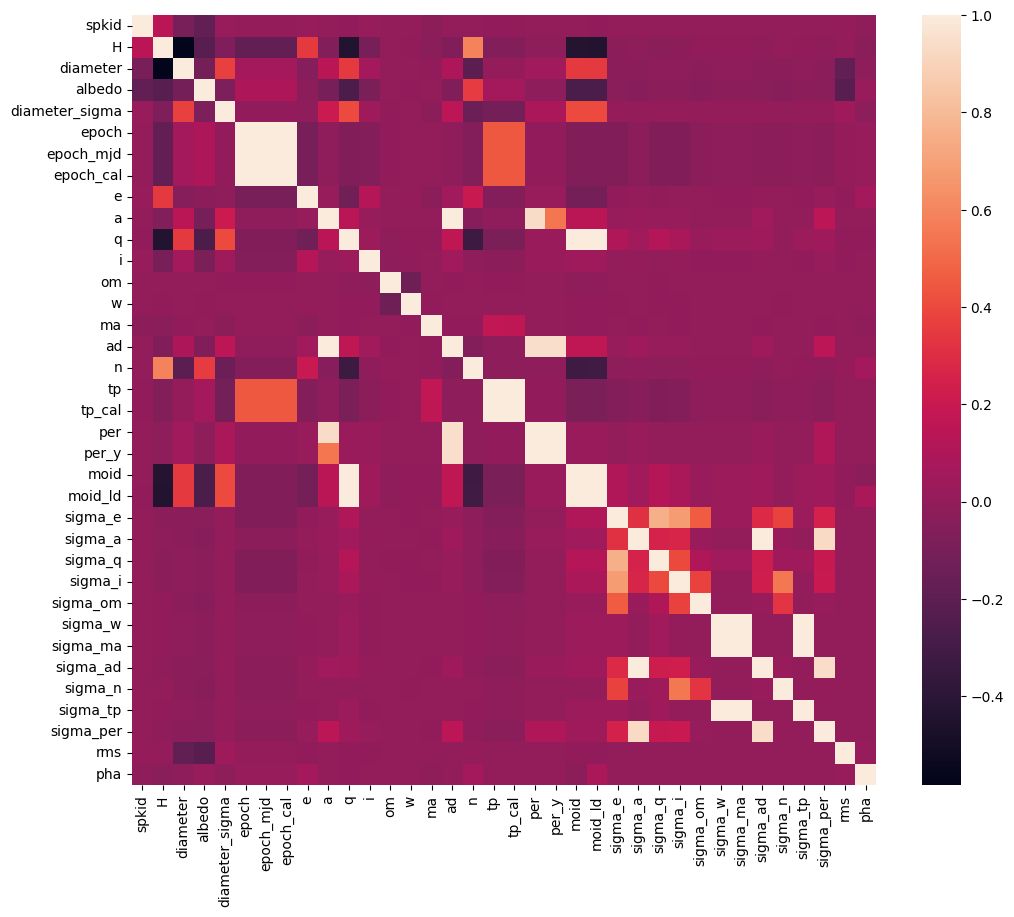

In [46]:
plt.figure(figsize=(12, 10))  # Adjust dimensions as needed
sns.heatmap(df[numeric_columns].corr(), annot=False, fmt=".2f")


In [47]:
df[numeric_columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 766819 entries, 307413 to 121958
Data columns (total 36 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   spkid           766819 non-null  int64  
 1   H               761840 non-null  float64
 2   diameter        108998 non-null  float64
 3   albedo          108112 non-null  float64
 4   diameter_sigma  108903 non-null  float64
 5   epoch           766819 non-null  float64
 6   epoch_mjd       766819 non-null  int64  
 7   epoch_cal       766819 non-null  float64
 8   e               766819 non-null  float64
 9   a               766819 non-null  float64
 10  q               766819 non-null  float64
 11  i               766819 non-null  float64
 12  om              766819 non-null  float64
 13  w               766819 non-null  float64
 14  ma              766818 non-null  float64
 15  ad              766816 non-null  float64
 16  n               766819 non-null  float64
 17  tp        

In [48]:
df = df.loc[df['pha'] != -1]

In [49]:
X = df[numeric_columns].drop(columns=['pha'])
y = df['pha']

In [50]:

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
hazard = tr.create_pipeline(X_train, y_train, LGBMClassifier(**ri.params_dict['LightGBM_2']))
hazard.fit(X_train, y_train)

/home/athyrson/miniconda3/envs/hpc/lib/python3.13/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as a different type depending on the ColumnTransformer inputs.
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('fill',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['spkid', 'H', 'diameter',
                                                   'albedo', 'diameter_sigma',
                                                   'epoch', 'epoch_mjd',
                                                   'epoch_cal', 'e', 'a', 'q',
                                                   'i', 'om', 'w', 'ma', 'ad',
                                                   'n', 'tp', 'tp_cal', 'per',
                                                   'per_y', 'moid', 'moid_ld',
                                                   'sigma_e', 'sigma_a',
                                                   'sigma_q', 'sigma_i',
                                                   'sigma_om', 'sigma_w',
                                                   'sigma_ma', ......
                                                  [])],
                                   verbose_feature_names_out=False)),
                ('classifier',
                 LGBMClassifier(colsample_bytree=0.22534977954592625,
                                is_unbalance=True,
                                learning_rate=0.052227873762946964, max_depth=5,
                                min_child_samples=26, n_estimators=159,
                                n_jobs=-1, num_leaves=12, random_state=880,
                                reg_alpha=0.7438345471808012,
                                reg_lambda=0.46164693905368515,
                                subsample=0.8896599304061413, verbose=-1))])

In [53]:
y_val.value_counts()

pha
0.0    149865
1.0       330
Name: count, dtype: int64

In [52]:
y_pred = hazard.predict(X_val)
ri.get_metrics_RI({'haz': hazard}, X_val, y_val, threshold_type='default')

,haz
Overall AUC,0.992181
KS,0.972323
Balanced Accuracy,0.977216
Accuracy,0.996771
Precision,0.401525
Recall,0.957576
F1,0.565801


In [54]:
import credit_pipeline.evaluate as ev

Accuracy of the model is:  0.9967708645427611


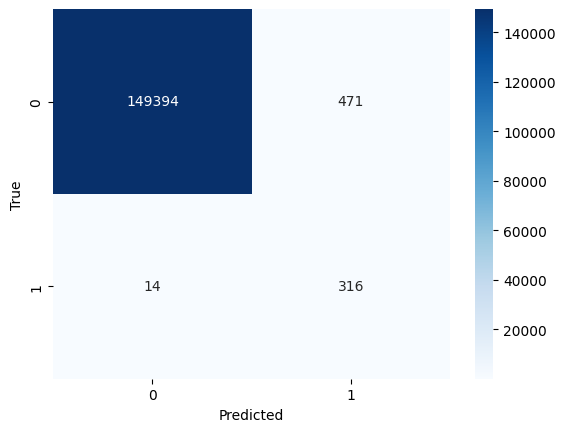

In [56]:
ev.plot_confusion_matrix(y_val, y_pred)